## Regressão linear com TensorFlow (low level)

Faremos a regressão linear de forma manual, sem utilizar bibliotecas prontas. Apenas utilizando variáveis e sessões do tensorflow.

In [2]:
import numpy as np

In [2]:
# Idade
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])

# Custo plano saúde REAL
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [3]:
X.shape

(10, 1)

In [4]:
y.shape

(10, 1)

In [5]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [6]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Escalonamento dos dados X (idade)
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [9]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
# Escalonamento dos dados y (custo plano saúde real)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [11]:
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

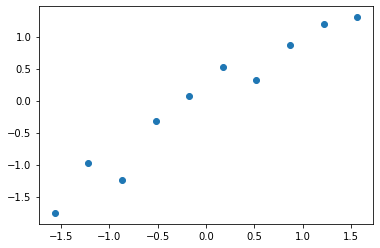

In [14]:
plt.scatter(X, y)

## Fórmula da regressão linear simples

y = b0 + b1 * x


Observação pessoal: na matemática, a função da regressão linear simples é denotada por:

f(x) = m * x + b

Onde:
* m é equivalente a b0
* b é equivalente a b1

In [15]:
# semente geradora aleatória para gerar os mesmos valores
np.random.seed(0)

# Criando 2 valores aleatórios entre 0 e 1 que representarão os valores
# de b0 (constante) e b1 (coeficiente que multiplica x)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [16]:
import tensorflow as tf

tf.__version__

/home/lucas/anaconda3/envs/env_gpu_tf-1.14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lucas/anaconda3/envs/env_gpu_tf-1.14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lucas/anaconda3/envs/env_gpu_tf-1.14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lucas/anaconda3/

'1.14.0'

Utilizamos Variables do TensorFlow para a constante e coeficiente para que durante o treinamento seja encontrado os melhores parâmetros.
Por isso é definido como variável para este valor se adaptar melhor ao modelo.

In [17]:
b0 = tf.Variable(0.54)  # utilizando os valores gerados anteriormente
b1 = tf.Variable(0.71)  # utilizando os valores gerados anteriormente

In [19]:
# Cálculo do erro MSE feito utilizando TensorFlow
# Passamos no primeiro parâmetro a resposta real e no outro a prevista (resultado da função linear)
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))

# Otimizador para o aprendizado da constante e coeficiente
# Utilizamos a descida do gradiente para encontrar o mínimo global e utilizamos o LR para definir o quanto é a movimentação do aprendizado
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

# objeto treinamento que fará de fato o treinamento (a regressão linear)
# o treinamento tem objeto de diminuir ao máximo o erro e encontrar os melhores parâmetros utilizando a descida do gradiente
treinamento = otimizador.minimize(erro)

# Inicializando as variáveis do TensorFlow
init = tf.global_variables_initializer()

Lembrando que no TensorFlow, as operações definidas não são executadas fora de uma sessão inicializada.

Portanto, apenas definimos anteriormente o que será executado posteriormente dentro de Sessão.

In [20]:
with tf.Session() as sess:
    sess.run(init)  # inicializando as variáveis dentro da sessão
    # print(sess.run(b0))  # exibe os valores atuais de b0
    # print(sess.run(b1))  # exibe os valores atuais de b0
    
    # definimos um range de 1000 que é a qtd de épocas que treinaremos
    for i in range(1000):
        sess.run(treinamento)  # executamos apenas 'treinamento' porque ele já depende do 'otimizador' e então fará a sua chamada internamente. E por sua vez chama a fórmula do 'erro'
    b0_final, b1_final = sess.run([b0, b1])

In [21]:
b0_final

0.07293496

In [22]:
b1_final

0.9359134

Após realizarmos o treinamento da regressão linear, encontramos os melhores parâmetros de b0 e b1. 

Posteriormente, iremos realizar as previsões.

In [23]:
# Realizando previsões com a fórmula da regressão linear com os parâmetros encontrados durante o treinamento
# Prevendo dados de custo de plano de saúde utilizando os dados de idade X
previsoes = b0_final + b1_final * X
previsoes

array([[-1.39335951],
       [-1.06751629],
       [-0.74167308],
       [-0.41582986],
       [-0.08998665],
       [ 0.23585657],
       [ 0.56169979],
       [ 0.887543  ],
       [ 1.21338622],
       [ 1.53922944]])

In [24]:
type(previsoes)

numpy.ndarray

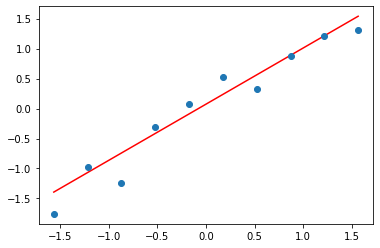

In [25]:
plt.plot(X, y, 'o')  # plotando valores originais de idade e custo (bolas azuis)
plt.plot(X, previsoes, color = 'red')  # plotando a linha da regressão com base nas previsões

In [28]:
# Escalonando o valor 40 para idade para posteriormente prever o custo do plano de saúde
scaler_x.transform((np.array(40).reshape(1, -1)))  # não utilizamos fit_transform porque já fizemos anteriormente

array([[-0.03481553]])

In [30]:
# Realizando a previsão do custo do plano de saúde utilizando a função de regressão linear e o valor 40 escalonado e com a mudança do shape para matriz

# O resultado da previsão receberá o dado escalonado, por isso usamos scaler_y para inverter o escalonamento e apresentar como dado na escala original
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform((np.array(40).reshape(1, -1))))
previsao

array([[1475.15949902]])

In [31]:
# Realizando o Desescalonamento dos dados reais de y para verificar na escala original do custo real do plano de saúde
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [32]:
# Realizando o Desescalonamento dos dados PREVISTOS do plano de saúde
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[ 993.37306876],
       [1102.86998473],
       [1212.3669007 ],
       [1321.86381666],
       [1431.36073263],
       [1540.8576486 ],
       [1650.35456456],
       [1759.85148053],
       [1869.3483965 ],
       [1978.84531246]])

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [37]:
mae

67.9187540892004

In [38]:
mse

7153.912871448908

In [8]:
np.random.randint(low=1, high=60, size=6)

array([39, 58, 35, 17,  2, 53])